# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [2]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [3]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180



Discrete metric?
Yes. Each visitor either clicked or didn’t click. That’s a binary outcome (categorical).

Large sample size?
Yes — over 1000 in each group. That’s large enough that approximations hold.

So which test?
→ Pearson’s chi-squared test is the go-to when comparing proportions in big samples.
(If you only had, say, 20 visitors per group, you’d instead use Fisher’s exact test.)

The chi-squared test works on a contingency table: it compares the observed counts of outcomes between groups to what you’d expect if there were no difference.

For this A/B test, the outcomes are clicked vs. didn’t click. Each visitor must fall into one of those two categories.

📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [4]:
# TODO

# H0: both A and B result in equal outcomes
# H1: Test B is statistically significantly different 


- Run the Test

In [5]:

from scipy.stats import chi2_contingency

# clicks vs non-clicks
data = [
    [150, 1000 - 150], # A. 150 clicks, 850 non-clicks
    [180, 1050 - 180]  # B. 180 clicks, 870 non-clicks
    ]

stat, p, dof, expected = chi2_contingency(data)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Reject H0: statistically significant difference in CTR.")
else:
    print("Fail to reject H0: not enough evidence of a CTR difference.")

p value is 0.20785388523374118
Fail to reject H0: not enough evidence of a CTR difference.


> Interpret Results

In [6]:
# TODO
# p value is 0.20785388523374118
# H1(alternative): The CTR of A and B are different.

📈 Visualization

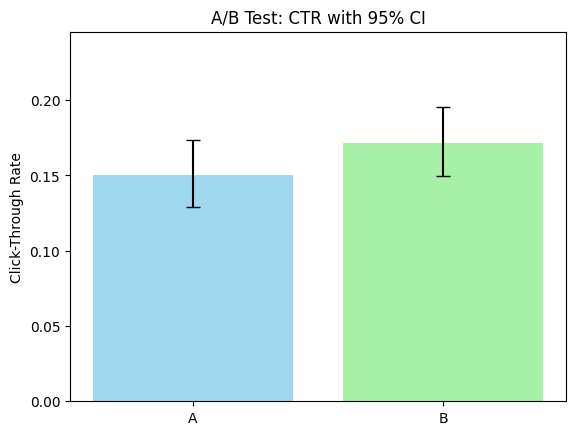

In [7]:
from statsmodels.stats.proportion import proportion_confint
# Data
clicks = np.array([150, 180])
visitors = np.array([1000, 1050])
groups = ["A", "B"]

# Compute CTRs
ctr = clicks / visitors

# 95% confidence intervals for proportions
ci_low, ci_high = proportion_confint(count=clicks, nobs=visitors, alpha=0.05, method='wilson')
ci_err = [ctr - ci_low, ci_high - ctr]  # asymmetric error bars

# Plot
fig, ax = plt.subplots()
ax.bar(groups, ctr, yerr=ci_err, capsize=5, color=["skyblue", "lightgreen"], alpha=0.8)
ax.set_ylabel("Click-Through Rate")
ax.set_title("A/B Test: CTR with 95% CI")
ax.set_ylim(0, max(ci_high) + 0.05)  # add some headroom
plt.show()

In [8]:
# Conclusion: Test A: 15% CTR, Test B: 17% CTR. The 2% gap is statistically significant.

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [9]:
### Import Libraries

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [10]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

data.head(20)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [12]:
data["test group"].unique()

array(['ad', 'psa'], dtype=object)

In [13]:
psa = (data["test group"] == "psa").sum()
print("psa count:", psa)
ad = (data["test group"] == "ad").sum()
print("ad count:", ad)

print("Total = ", ad + psa)
print("----------")

yes_convert = (data["converted"] == True).sum()
print("total converted:", yes_convert)
no_convert = (data["converted"] == False).sum()
print("total did not convert:", no_convert)


psa count: 23524
ad count: 564577
Total =  588101
----------
total converted: 14843
total did not convert: 573258


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [14]:
table = pd.crosstab(data["test group"], data["converted"])

print(table)

converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [15]:
# Conversion counts (True column) and totals
conversions = table[True]
totals = table.sum(axis=1)

# Conversion rates
rates = conversions / totals

print("Conversions:\n", conversions)
print("\nTotals:\n", totals)
print("\nConversion rates (%):\n", (rates * 100).round(2))


Conversions:
 test group
ad     14423
psa      420
Name: True, dtype: int64

Totals:
 test group
ad     564577
psa     23524
dtype: int64

Conversion rates (%):
 test group
ad     2.55
psa    1.79
dtype: float64


> Statistical Test

In [16]:
stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('H1(alternative): reject H0, statistically significant difference in converstion rates.')
else:
    print('H0(null): The conversion rate is independent of group (PSA vs Ad).')

p value is 1.9989623063390078e-13
H1(alternative): reject H0, statistically significant difference in converstion rates.


#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [35]:
def bootstrap_diff_proportions_fast(clicks_a, total_a, clicks_b, total_b,
                                    iters=5000, alpha=0.05, seed=42):
    rng = np.random.default_rng(seed)

    # observed rates and observed difference (B - A as you wrote before)
    p_a = clicks_a / total_a
    p_b = clicks_b / total_b
    obs = p_b - p_a

    # --- CI via parametric bootstrap around observed rates (what you already had)
    ctr_a = rng.binomial(total_a, p_a, size=iters) / total_a
    ctr_b = rng.binomial(total_b, p_b, size=iters) / total_b
    diffs = ctr_b - ctr_a
    lo, hi = np.percentile(diffs, [100*alpha/2, 100*(1-alpha/2)])

    # --- p-value via null-based bootstrap (pooled rate)
    pooled_p = (clicks_a + clicks_b) / (total_a + total_b)
    null_a = rng.binomial(total_a, pooled_p, size=iters) / total_a
    null_b = rng.binomial(total_b, pooled_p, size=iters) / total_b
    null_diffs = null_b - null_a
    p_boot = (np.abs(null_diffs) >= abs(obs)).mean()

    return obs, (lo, hi), p_boot


obs, ci, p = bootstrap_diff_proportions_fast(
    clicks_a=14423, total_a=564577,
    clicks_b=420,   total_b=23524,
    iters=5000
)
print("Observed difference (psa − ad):", obs)
print("95% CI:", ci)
print("Bootstrap p-value:", p)


Observed difference (psa − ad): -0.007692453192201517
95% CI: (np.float64(-0.009439161981139652), np.float64(-0.005958364452207205))
Bootstrap p-value: 0.0


>Visualize Resultsm

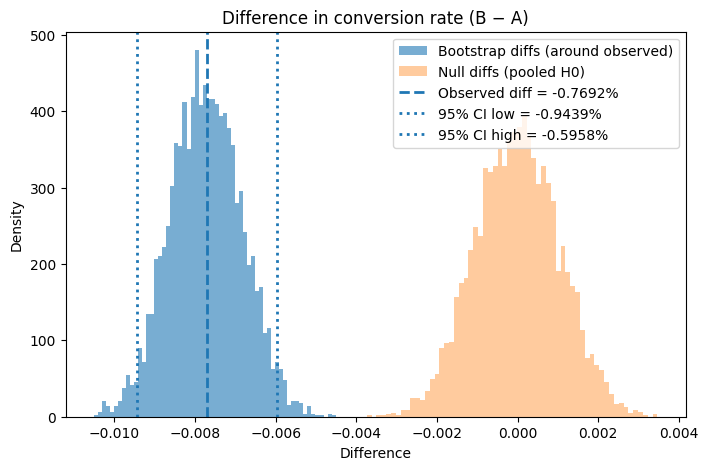

Observed diff (B−A): -0.7692%
95% CI: [-0.9439%, -0.5958%]
Bootstrap p-value: 0


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_plot_ab(clicks_a, total_a, clicks_b, total_b, iters=5000, alpha=0.05, seed=42):
    rng = np.random.default_rng(seed)

    # observed rates (report B − A)
    p_a = clicks_a / total_a
    p_b = clicks_b / total_b
    obs = p_b - p_a

    # CI via parametric bootstrap around observed rates
    ctr_a = rng.binomial(total_a, p_a, size=iters) / total_a
    ctr_b = rng.binomial(total_b, p_b, size=iters) / total_b
    diffs = ctr_b - ctr_a
    lo, hi = np.percentile(diffs, [100*alpha/2, 100*(1-alpha/2)])

    # p-value via null-pooled bootstrap (H0: p_a == p_b)
    pooled_p = (clicks_a + clicks_b) / (total_a + total_b)
    null_a = rng.binomial(total_a, pooled_p, size=iters) / total_a
    null_b = rng.binomial(total_b, pooled_p, size=iters) / total_b
    null_diffs = null_b - null_a
    p_boot = (np.abs(null_diffs) >= abs(obs)).mean()

    # ---- visualize
    plt.figure(figsize=(8,5))
    plt.hist(diffs, bins=60, alpha=0.6, density=True, label="Bootstrap diffs (around observed)")
    plt.hist(null_diffs, bins=60, alpha=0.4, density=True, label="Null diffs (pooled H0)")
    plt.axvline(obs, linestyle="--", linewidth=2, label=f"Observed diff = {obs:.4%}")
    plt.axvline(lo, linestyle=":", linewidth=2, label=f"95% CI low = {lo:.4%}")
    plt.axvline(hi, linestyle=":", linewidth=2, label=f"95% CI high = {hi:.4%}")
    plt.title("Difference in conversion rate (B − A)")
    plt.xlabel("Difference")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    return obs, (lo, hi), p_boot

# --- If you already have the crosstab `table` with columns [False, True] and index ['ad','psa'] ---
# conversions (True) and totals per group
conv = table[True]
nobs = table.sum(axis=1)

# A = ad, B = psa  (diff will be PSA − Ad; flip if you prefer the opposite)
obs, ci, p = bootstrap_plot_ab(
    clicks_a=int(conv['ad']),   total_a=int(nobs['ad']),
    clicks_b=int(conv['psa']),  total_b=int(nobs['psa']),
    iters=5000, alpha=0.05, seed=42
)

print(f"Observed diff (B−A): {obs:.4%}")
print(f"95% CI: [{ci[0]:.4%}, {ci[1]:.4%}]")
print(f"Bootstrap p-value: {p:.4g}")


## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [19]:
# Import Libraries

In [20]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [21]:
# TODO
# Insert your code HERE

> Statistical Test

In [22]:
# TODO
# Insert your code HERE

📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [23]:
# TODO
# Insert your code HERE

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [24]:
# TODO
# Insert your code HERE

Enjoy & Happy A/B Testing :) ......!